# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
file_path = r"C:\Users\maria\Downloads\spaceship_titanic.csv"
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  Fo

**Check the shape of your data**

In [8]:
df.shape, df.columns.tolist()

((8693, 14),
 ['PassengerId',
  'HomePlanet',
  'CryoSleep',
  'Cabin',
  'Destination',
  'Age',
  'VIP',
  'RoomService',
  'FoodCourt',
  'ShoppingMall',
  'Spa',
  'VRDeck',
  'Name',
  'Transported'])

**Check for data types**

In [9]:
df.info()
df.isna().sum().sort_values(ascending=False)
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,9280_02,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


**Check for missing values**

In [10]:
total_missing = df.isna().sum().sum()
percent_missing = 100 * total_missing / df.size

print(f"Total missing values: {total_missing}")
print(f"Percentage missing: {percent_missing:.2f}%")

Total missing values: 2324
Percentage missing: 1.91%


In [11]:
# Drop rows with missing values
df = df.dropna()

print("Remaining missing values:", df.isna().sum().sum())
print("New shape:", df.shape)

Remaining missing values: 0
New shape: (6606, 14)


**KNN**

In [12]:
# Select only numerical columns
X = df.select_dtypes(include=['int64', 'float64'])

# Target defined
y = df['Transported'].astype(int)

X.head()
X.shape, y.shape

((6606, 6), (6606,))

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [14]:
from sklearn.model_selection import train_test_split

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps class balance
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5284, 6), (1322, 6), (5284,), (1322,))

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier()

Fit the model to your data.

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate your model.

Accuracy: 0.756

Classification Report:

              precision    recall  f1-score   support

           0      0.773     0.721     0.746       656
           1      0.742     0.791     0.766       666

    accuracy                          0.756      1322
   macro avg      0.758     0.756     0.756      1322
weighted avg      0.757     0.756     0.756      1322



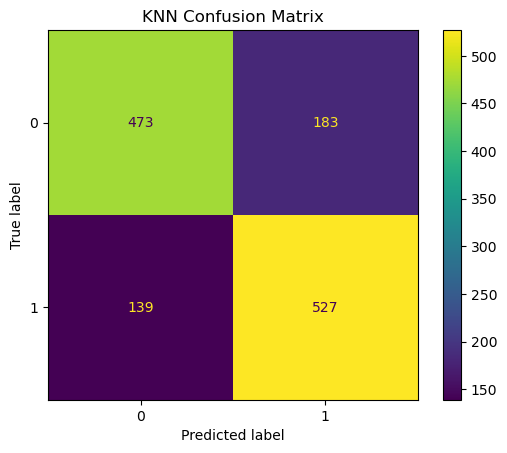

In [17]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting
y_pred = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

# (precision, recall, f1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("KNN Confusion Matrix")
plt.show()

**Congratulations, you have just developed your first Machine Learning model!**